In [1]:
import pandas as pd 
import os
import os
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from wordcloud import STOPWORDS
from collections import defaultdict

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests



 


In [2]:
#load our data
df = pd.read_csv('processed_tweets.csv')

In [3]:
#check the shape
df.shape

(13399, 8)

sentiment
NEG    2506
NEU    5199
POS    5537
dtype: int64


<Axes: >

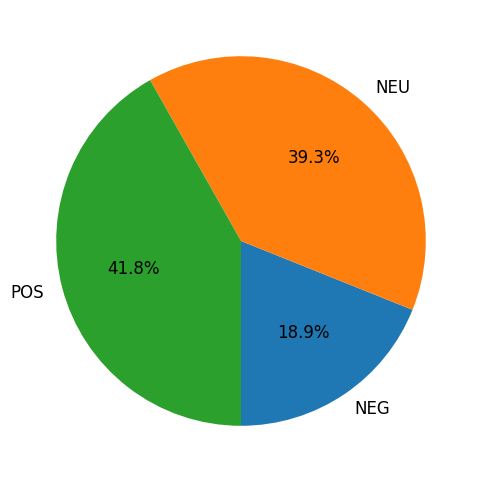

In [4]:
# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.sort_values(by=['created_at'], inplace=True, ascending=True)

In [6]:

# find the number of tweets per day and plot it
tweets_per_day = defaultdict(int)
for date in df['created_at']:
    tweets_per_day[date.date()] += 1

tweets_per_day = pd.DataFrame.from_dict(tweets_per_day, orient='index', columns=['count'])
tweets_per_day.sort_index(inplace=True)


<Axes: title={'center': 'Number of tweets per day'}>

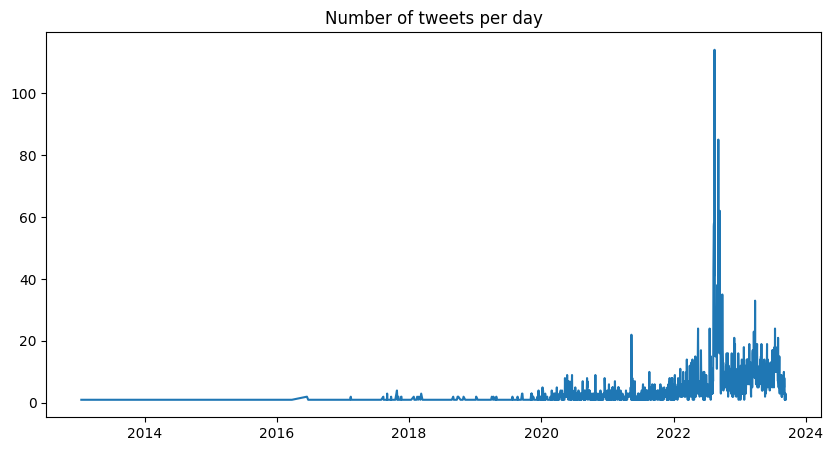

In [7]:
tweets_per_day.plot(figsize=(10,5), title='Number of tweets per day', legend=False)

In [8]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [10]:
#removing twitter handles (@user)
df['Tidy_Tweets'] = np.vectorize(remove_pattern)(df['full_text'], "@[\w]*")

df.head()

,full_text,reply_count,retweet_count,favorite_count,url,created_at,view_count,sentiment,Tidy_Tweets
0,Before you throw a stone against another mwana...,447.0,3209.0,1972.0,https://twitter.com/skmusyoka/status/291771410...,2013-01-17 04:58:19+00:00,NaN,NEU,Before you throw a stone against another mwana...
1,"Change is coming to Siaya, with Governor Willi...",38.0,22.0,8.0,https://twitter.com/WilliamOduol/status/294074...,2013-01-23 13:31:37+00:00,NaN,POS,"Change is coming to Siaya, with Governor Willi..."
2,Happy Easter. Mujivinjari watunguyaz na musi b...,249.0,1425.0,1094.0,https://twitter.com/WMutunga/status/7132132116...,2016-03-25 03:57:35+00:00,NaN,POS,Happy Easter. Mujivinjari watunguyaz na musi b...
3,It's my 69th birthday today &amp; my last day ...,1202.0,1410.0,1982.0,https://twitter.com/WMutunga/status/7432960613...,2016-06-16 04:16:05+00:00,NaN,NEU,It's my 69th birthday today &amp; my last day ...
4,"Niaje tweeps? Sasa mimi ni citizen, thanks kwa...",215.0,890.0,785.0,https://twitter.com/WMutunga/status/7435500788...,2016-06-16 21:05:27+00:00,NaN,POS,"Niaje tweeps? Sasa mimi ni citizen, thanks kwa..."


In [11]:
#removing special characters, numbers, punctuations
df['Tidy_Tweets'] = df['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

df.head(3)

,full_text,reply_count,retweet_count,favorite_count,url,created_at,view_count,sentiment,Tidy_Tweets
0,Before you throw a stone against another mwana...,447.0,3209.0,1972.0,https://twitter.com/skmusyoka/status/291771410...,2013-01-17 04:58:19+00:00,NaN,NEU,Before you throw a stone against another mwana...
1,"Change is coming to Siaya, with Governor Willi...",38.0,22.0,8.0,https://twitter.com/WilliamOduol/status/294074...,2013-01-23 13:31:37+00:00,NaN,POS,"Change is coming to Siaya, with Governor Willi..."
2,Happy Easter. Mujivinjari watunguyaz na musi b...,249.0,1425.0,1094.0,https://twitter.com/WMutunga/status/7132132116...,2016-03-25 03:57:35+00:00,NaN,POS,Happy Easter. Mujivinjari watunguyaz na musi b...


In [12]:
#removing short words
df['Tidy_Tweets'] = df['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df.head(3)

,full_text,reply_count,retweet_count,favorite_count,url,created_at,view_count,sentiment,Tidy_Tweets
0,Before you throw a stone against another mwana...,447.0,3209.0,1972.0,https://twitter.com/skmusyoka/status/291771410...,2013-01-17 04:58:19+00:00,NaN,NEU,Before throw stone against another mwananchi p...
1,"Change is coming to Siaya, with Governor Willi...",38.0,22.0,8.0,https://twitter.com/WilliamOduol/status/294074...,2013-01-23 13:31:37+00:00,NaN,POS,"Change coming Siaya, with Governor William Odu..."
2,Happy Easter. Mujivinjari watunguyaz na musi b...,249.0,1425.0,1094.0,https://twitter.com/WMutunga/status/7132132116...,2016-03-25 03:57:35+00:00,NaN,POS,Happy Easter. Mujivinjari watunguyaz musi brea...


In [13]:
#tokenization
tokenized_tweet = df['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Before, throw, stone, against, another, mwana...
1    [Change, coming, Siaya,, with, Governor, Willi...
2    [Happy, Easter., Mujivinjari, watunguyaz, musi...
3    [It's, 69th, birthday, today, &amp;, last, Hav...
4    [Niaje, tweeps?, Sasa, mimi, citizen,, thanks,...
Name: Tidy_Tweets, dtype: object

In [14]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [befor, throw, stone, against, anoth, mwananch...
1    [chang, come, siaya,, with, governor, william,...
2    [happi, easter., mujivinjari, watunguyaz, musi...
3    [it', 69th, birthday, today, &amp;, last, have...
4    [niaj, tweeps?, sasa, mimi, citizen,, thank, s...
Name: Tidy_Tweets, dtype: object

In [15]:
#stitching tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Tidy_Tweets'] = tokenized_tweet
df.head(3)

,full_text,reply_count,retweet_count,favorite_count,url,created_at,view_count,sentiment,Tidy_Tweets
0,Before you throw a stone against another mwana...,447.0,3209.0,1972.0,https://twitter.com/skmusyoka/status/291771410...,2013-01-17 04:58:19+00:00,NaN,NEU,befor throw stone against anoth mwananchi poli...
1,"Change is coming to Siaya, with Governor Willi...",38.0,22.0,8.0,https://twitter.com/WilliamOduol/status/294074...,2013-01-23 13:31:37+00:00,NaN,POS,"chang come siaya, with governor william oduol...."
2,Happy Easter. Mujivinjari watunguyaz na musi b...,249.0,1425.0,1094.0,https://twitter.com/WMutunga/status/7132132116...,2016-03-25 03:57:35+00:00,NaN,POS,happi easter. mujivinjari watunguyaz musi brea...


In [16]:
#store all the words from the tweets that are positive
all_words_positive= ' '.join([text for text in df['Tidy_Tweets'][df['sentiment'] == 'POS']])

In [17]:

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

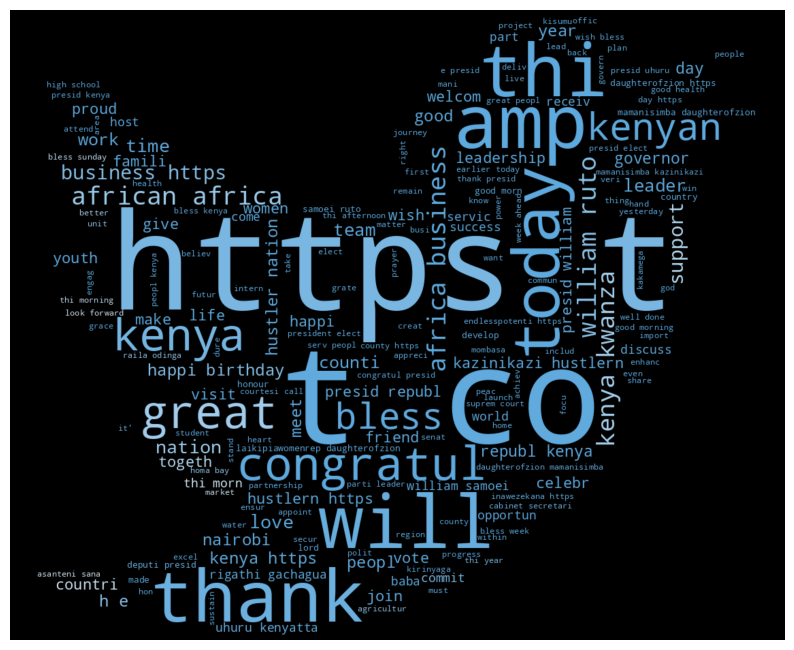

In [18]:

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [20]:
#store all the words from the tweets that are negative
all_words_negative= ' '.join([text for text in df['Tidy_Tweets'][df['sentiment'] == 'NEG']])
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

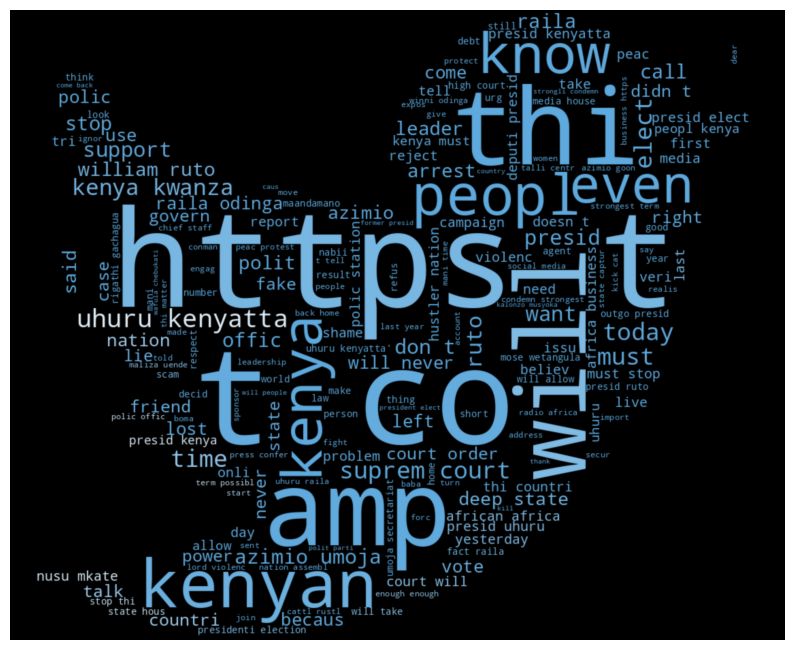

In [21]:

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [22]:
#function to extract hashtags
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [23]:
ht_positive = Hashtags_Extract(df['Tidy_Tweets'][df['sentiment'] == 'POS'])
ht_negative = Hashtags_Extract(df['Tidy_Tweets'][df['sentiment'] == 'NEG'])

In [24]:
#unnesting list
ht_positive_unnest = sum(ht_positive,[])
ht_negative_unnest = sum(ht_negative,[])


In [25]:
#counting the frequency of words having positive sentiment
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
#creating a dataframe for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

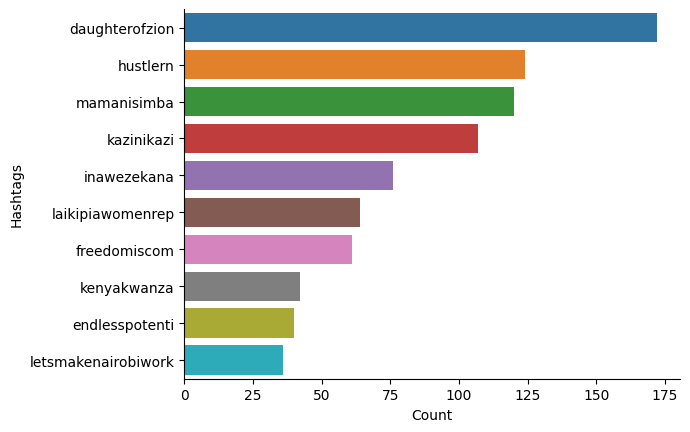

In [26]:
#plotting the barplot for the most frequently used words in hashtags
df_positive_plot = df_positive.nlargest(10,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [27]:
# counting the frequency of words having negative sentiment
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})


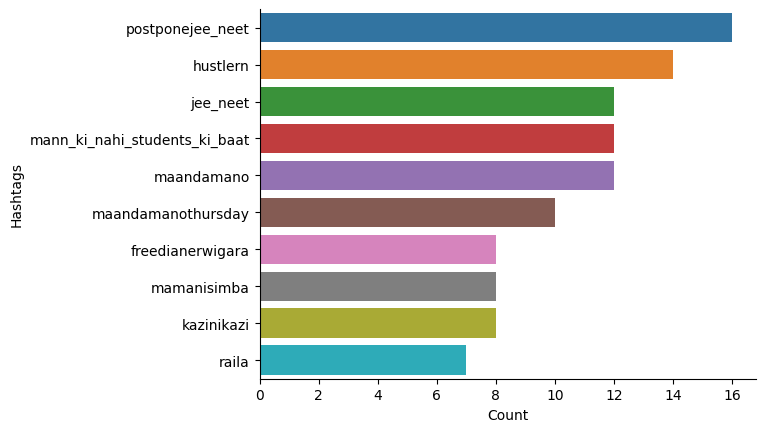

In [28]:
#plotting the barplot for the most frequently used words in hashtags
df_negative_plot = df_negative.nlargest(10,columns='Count')
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [29]:
# Define a mapping dictionary
sentiment_mapping = {'POS': 0, 'NEG': 1, 'NEU': 2}

# Map the 'sentiment' column to numerical labels
df['sentiment_label'] = df['sentiment'].map(sentiment_mapping)

# Now, your DataFrame will have a new column 'sentiment_label' with numerical labels.


In [31]:
#MODELLING

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')


# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['Tidy_Tweets'])
df_bow = pd.DataFrame(bow.todense())

In [32]:
tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Tidy_Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())


In [33]:
train_bow = bow[:10000]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [34]:
train_tfidf_matrix = tfidf_matrix[:10000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(
    train_bow, 
    df['sentiment_label'][:10000], 
    test_size=0.3, 
    random_state=2)



In [37]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(
    train_tfidf_matrix, 
    df['sentiment_label'][:10000], 
    test_size=0.3, 
    random_state=17)

In [38]:
y_train_bow.fillna(0, inplace=True)
y_valid_bow.fillna(0, inplace=True)

In [39]:
y_train_tfidf.fillna(0, inplace=True)
y_valid_tfidf.fillna(0, inplace=True)

In [40]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Initialize a list to store F1 scores for each model
f1_scores = []
accuracy_scores = []
# Models to test
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, random_state=42)),
]

# Iterate over models
for model_name, model in models:
    # For BOW
    model.fit(x_train_bow, y_train_bow)
    prediction_bow = model.predict_proba(x_valid_bow)
    prediction_int = (prediction_bow[:,1] >= 0.3).astype(int)
    f1_bow = f1_score(y_valid_bow, prediction_int, average='weighted')
    
    # For TFIDF
    model.fit(x_train_tfidf, y_train_tfidf)
    prediction_tfidf = model.predict_proba(x_valid_tfidf)
    prediction_int = (prediction_tfidf[:,1] >= 0.3).astype(int)
    f1_tfidf = f1_score(y_valid_tfidf, prediction_int, average='weighted')
    
    f1_scores.append((model_name, f1_bow, f1_tfidf))

# Print F1 scores for each model
for model_name, f1_bow, f1_tfidf in f1_scores:
    print(f"{model_name} (BOW): {f1_bow:.4f}, (TFIDF): {f1_tfidf:.4f}")


/home/tevin/Desktop/Tems/twitter/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (BOW): 0.4105, (TFIDF): 0.4090
Multinomial Naive Bayes (BOW): 0.4092, (TFIDF): 0.4009
Random Forest (BOW): 0.4227, (TFIDF): 0.4252
Gradient Boosting (BOW): 0.3858, (TFIDF): 0.3980
XGBoost (BOW): 0.4116, (TFIDF): 0.4173


In [41]:
f1_scores

[('Logistic Regression', 0.4105139125995244, 0.4090232266843002),
 ('Multinomial Naive Bayes', 0.409167875306843, 0.4009304896459225),
 ('Random Forest', 0.4227211546420868, 0.42524134614903003),
 ('Gradient Boosting', 0.38578205196267346, 0.3980211981123438),
 ('XGBoost', 0.4115733477369286, 0.4172774020863977)]

In [43]:
f1_df = pd.DataFrame(f1_scores, columns=['Model', 'F1 (BOW)', 'F1 (TFIDF)'])
f1_df.head()

,Model,F1 (BOW),F1 (TFIDF)
0,Logistic Regression,0.410514,0.409023
1,Multinomial Naive Bayes,0.409168,0.400930
2,Random Forest,0.422721,0.425241
3,Gradient Boosting,0.385782,0.398021
4,XGBoost,0.411573,0.417277
